**Step 1:** You need a series of pictures of the board with pieces in various positions.  They don't have to be legitimate board states.  Here's an example set:

In [1]:
%matplotlib inline
from pylab import *

In [5]:
from glob import glob
import os

In [10]:
fnames=glob('images/board images/*.jpg')
test_image='images/board images/test9.jpg'
fnames.remove(test_image)  # this will be the image I will reconstruct, so I don't want it in the training
fnames

['images/board images/test10.jpg',
 'images/board images/test6.jpg',
 'images/board images/test7.jpg',
 'images/board images/test5.jpg',
 'images/board images/test4.jpg',
 'images/board images/test0.jpg',
 'images/board images/test1.jpg',
 'images/board images/test3.jpg',
 'images/board images/test2.jpg',
 'images/board images/test8.jpg']

Text(0.5, 1.0, 'test9.jpg[TEST]')

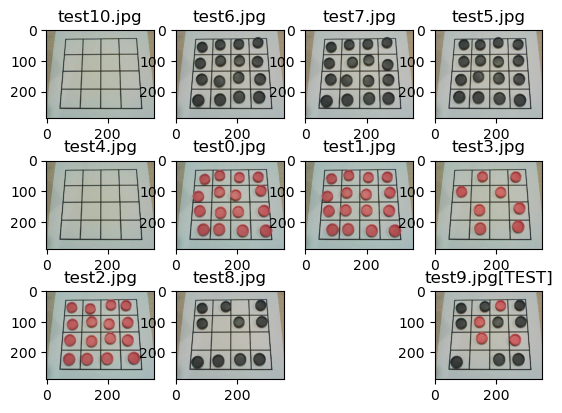

In [14]:
for i,fname in enumerate(fnames):
    im=imread(fname)
    subplot(3,4,i+1)
    imshow(im)

    root,part=os.path.split(fname)
    
    title(part)

subplot(3,4,12)
fname=test_image
im=imread(fname)
imshow(im)
root,part=os.path.split(fname)
title(part + "[TEST]")


**Step 2:** Now you need the locations of the centers of the squares.  You can do something like 2023-11-13 - Arrays and Images.ipynb, or perhaps easier, run the 2023-11-13 - Get Board Center Square Locations.ipynb on one of the images, select the center squares, and hit the escape key.  It will save the centers to a json file which we load here.

In [15]:
import json
with open('locations.json') as json_file:
    locations = json.load(json_file)
locations

[[55, 89],
 [55, 145],
 [55, 208],
 [54, 269],
 [105, 87],
 [105, 149],
 [105, 206],
 [105, 268],
 [163, 82],
 [163, 144],
 [163, 208],
 [162, 270],
 [222, 75],
 [222, 145],
 [223, 211],
 [221, 276]]

**Step 3:** Run through all the center locations for each file, extract a square, and save it as another image.  We'll be saving it to a folder I've already made called "images/training squares".

In [18]:
square_size=50 # choose a size that works for you


count=0
for i,fname in enumerate(fnames):
    im=imread(fname)

    
    for r,c in locations:
        sr=r-square_size//2
        er=sr+square_size
        sc=c-square_size//2
        ec=sc+square_size   
        subimage=im[sr:er,sc:ec,:]
    
        square_fname='images/training squares/square%d.jpg' % count
        print(square_fname)
        imsave(square_fname,subimage)
        
        count+=1

images/training squares/square0.jpg
images/training squares/square1.jpg
images/training squares/square2.jpg
images/training squares/square3.jpg
images/training squares/square4.jpg
images/training squares/square5.jpg
images/training squares/square6.jpg
images/training squares/square7.jpg
images/training squares/square8.jpg
images/training squares/square9.jpg
images/training squares/square10.jpg
images/training squares/square11.jpg
images/training squares/square12.jpg
images/training squares/square13.jpg
images/training squares/square14.jpg
images/training squares/square15.jpg
images/training squares/square16.jpg
images/training squares/square17.jpg
images/training squares/square18.jpg
images/training squares/square19.jpg
images/training squares/square20.jpg
images/training squares/square21.jpg
images/training squares/square22.jpg
images/training squares/square23.jpg
images/training squares/square24.jpg
images/training squares/square25.jpg
images/training squares/square26.jpg
images/trai

The folder will now look like: 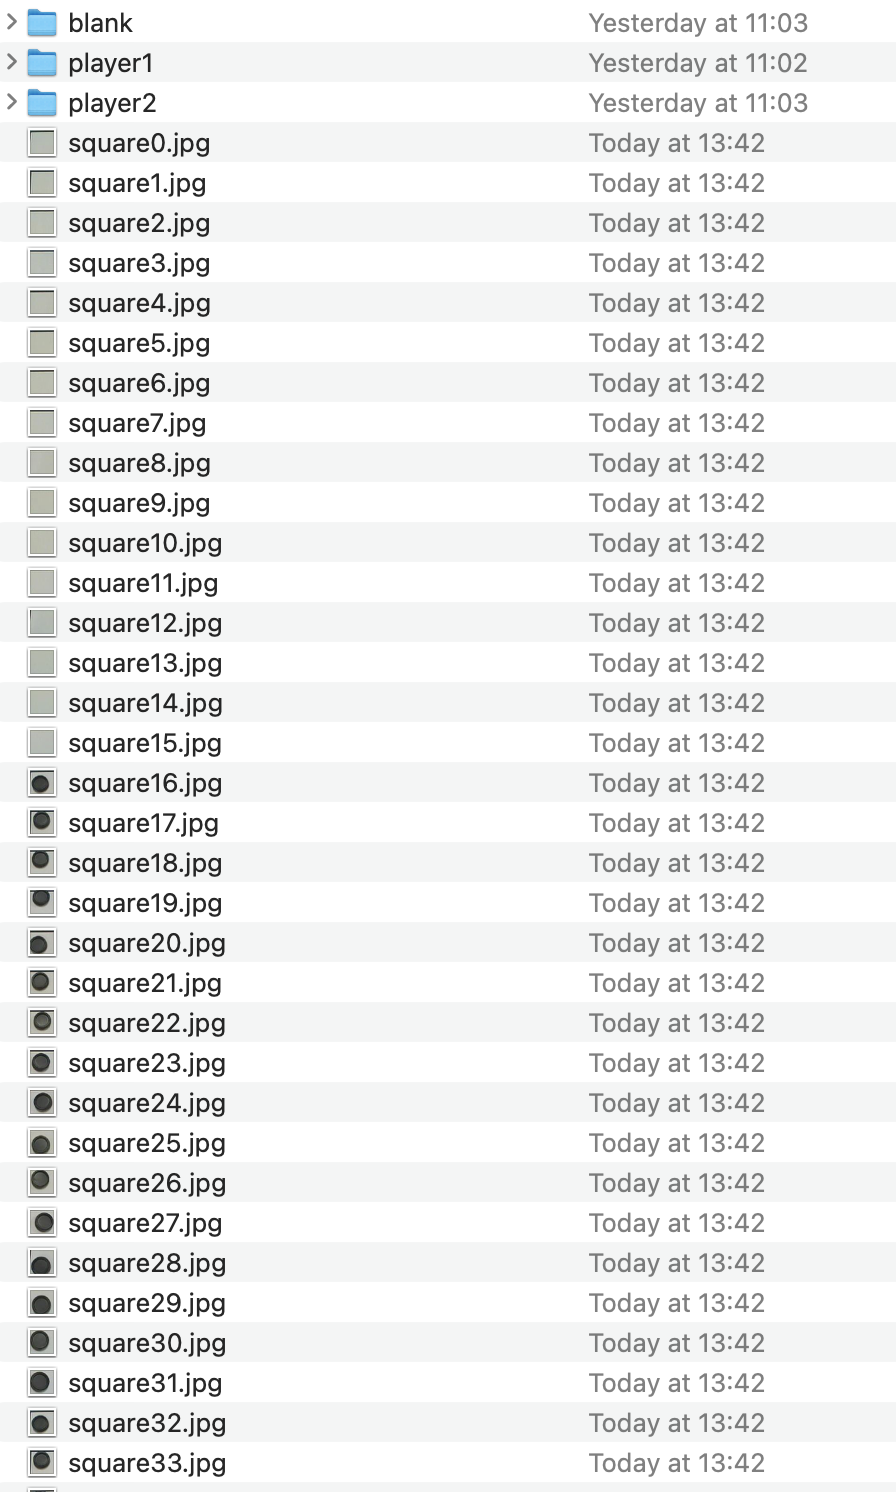

**Step 4:** By hand, in the file explorer, put the right images into the right folders.  There may be ways to automate this step, but since you only need to do this once, by hand will work fine.

The folder will look something like this:
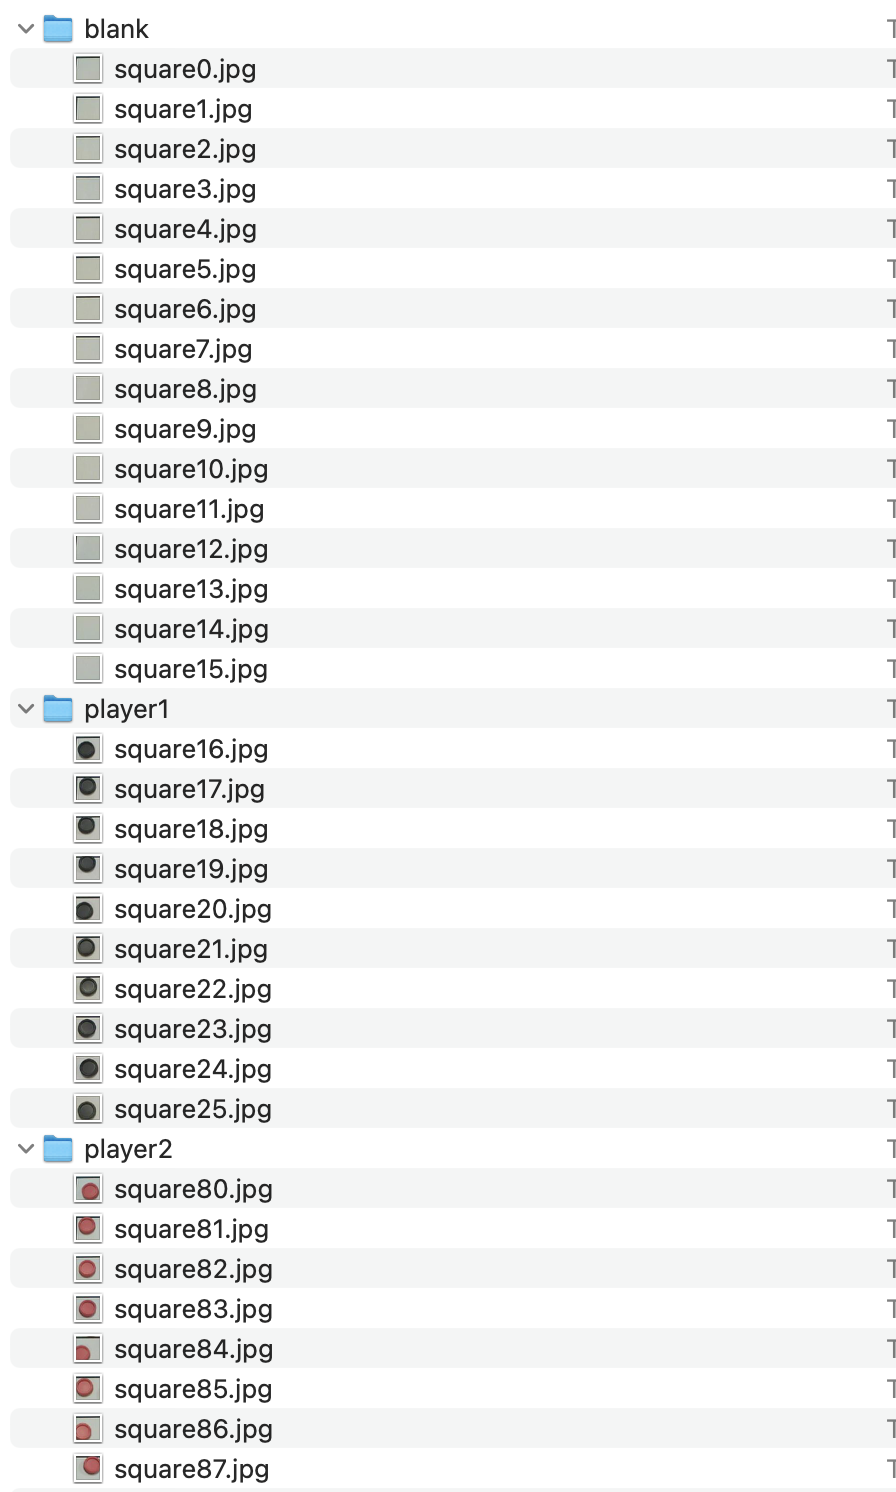

Now you have a training set!